In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from scipy.constants import c
from scipy.optimize import curve_fit
from datetime import datetime

#%matplotlib qt

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
#f_carrier = 8431.0165302617e6 before GPSDO software change, average of Oct 11-17th.
f_carrier = 8431.01653051e6

In [3]:
#strf rfplot.c and rffit.c modified to allow for 6 decimals of sigma data.

data = np.fromfile('2020-10-25_tianwen1.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
amp_data = data[:,2]


In [4]:
#modified ve7til.script to report Range data rather the RangeRate.

gmd_file = '/home/scott/code/GMAT/R2020a/output/ve7til1.gmd'
gmd_mjd = []
gmd_range = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_range.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_range = np.array(gmd_range)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

In [5]:
fspl = (4*np.pi*f_carrier*gmd_range*1000)/c
fspl = fspl * fspl
fspl = 10 * np.log10(fspl)

#reference obtained by averaging a large area of cold sky data with strf
amp_snr = 10 * np.log10(amp_data/0.000837912) 

In [6]:
#Determine the delta free space loss bewteen approximate start for observed data session and TIANWEN-1 arrival at Mars.

i = 0

while t_gmd[i] < t_data[i]:
    i += 1

delta_fspl = fspl[1681] - fspl[i]

print('FSPL = %s dB'%delta_fspl)

FSPL = 13.379589751936123 dB


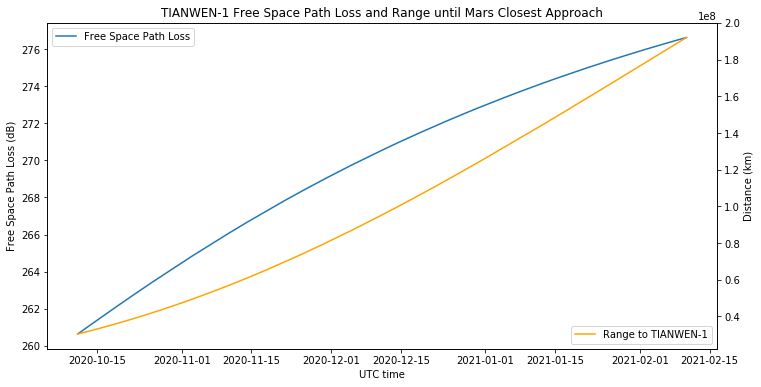

In [7]:
plt.plot(t_gmd.datetime,fspl,markersize=1, alpha=2, label = 'Free Space Path Loss')
plt.title('TIANWEN-1 Free Space Path Loss and Range until Mars Closest Approach')
plt.ylabel('Free Space Path Loss (dB)')
plt.xlabel('UTC time')
plt.legend()

ax2 = plt.twinx()
ax2.set_ylabel('Distance (km)')
ax2.plot(t_gmd.datetime, gmd_range, color = 'orange', label = 'Range to TIANWEN-1')
ax2.legend(loc=4)
plt.show();

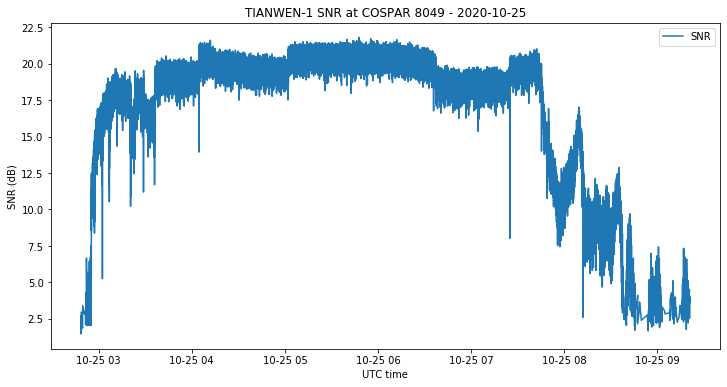

In [8]:
#%matplotlib qt
plt.plot(t_data.datetime, amp_snr,markersize=.5,  label = 'SNR')
plt.title('TIANWEN-1 SNR at COSPAR 8049 - %s'%t_data.datetime[0].strftime('%Y-%m-%d'))
plt.ylabel('SNR (dB)')
plt.xlabel('UTC time')
plt.legend()
plt.show();